In [81]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
#rcParams['figure.figsize'] = 80,50

In [2]:
#Preprocess training set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/labels.csv')

labelsTrain = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTrain.drop(columns =[0,2], inplace = True)
labelsTrain.columns = ["img_name"  , "smiling"]
labelsTrain = labelsTrain.astype({'smiling': 'int32'})
labelsTrain = labelsTrain.astype({'img_name': 'string'})

#Preprocess testing set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/labels.csv')

labelsTest = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTest.drop(columns =[0,2], inplace = True)
labelsTest.columns = ["img_name"  , "smiling"]
labelsTest = labelsTest.astype({'smiling': 'int32'})
labelsTest = labelsTest.astype({'img_name': 'string'})


In [3]:
#Load training set################################
imagesTrain = np.zeros((5000, 218, 178))

for i in range(0,5000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/img/' + labelsTrain["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTrain[i] = image
    
imagesTrain = imagesTrain.reshape(5000,38804)    
imagesTrain = pd.DataFrame(imagesTrain) 


#Load Testing set################################
imagesTest = np.zeros((1000, 218, 178))

for i in range(0,1000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/img/' + labelsTest["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTest[i] = image
    
imagesTest = imagesTest.reshape(1000,38804)   

imagesTest = pd.DataFrame(imagesTest) 

In [87]:
#scale coversion
scaler = MinMaxScaler()

imagesTrain_scaled = scaler.fit_transform(imagesTrain)
imagesTest_scaled = scaler.transform(imagesTest)


In [88]:
#PCA conversion
pca = PCA(n_components = 150)

imagesTrain_pca = pca.fit_transform(imagesTrain_scaled)
imagesTest_pca = pca.transform(imagesTest_scaled)

imagesTrain_pca = pd.DataFrame(imagesTrain_pca) 
imagesTest_pca = pd.DataFrame(imagesTest_pca) 

In [63]:
pca.explained_variance_ratio_


0.0012679215063533427

In [17]:
imagesTrain_pca

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,26.669027,-3.010113,0.366209,-12.013860,-10.728321,4.044433,26.860383,5.570333,-8.822359,1.238482,...,1.086372,0.318456,-1.523004,-0.417795,-0.527827,-0.982846,0.818666,0.421479,-0.087218,-0.637012
1,-8.542702,20.497358,1.708910,-5.413798,-4.178639,1.759209,-6.362811,-13.287253,6.202106,-6.723458,...,-0.062889,0.924232,0.835930,-0.089357,0.232973,0.598931,-1.679291,2.307358,-0.351171,1.669807
2,24.068655,-4.079156,-13.739504,-5.215119,-2.575907,13.642572,-9.142209,-18.403577,10.095915,-8.698209,...,0.576403,0.849425,-0.480660,0.010254,1.727721,-0.265001,0.087033,-0.475256,-1.073559,-0.428151
3,-40.542844,2.332370,25.871265,0.418673,0.756152,-7.282323,-14.998997,-0.572475,-7.597043,4.094117,...,-0.050964,0.303327,0.324284,1.170072,1.726304,-3.204149,-0.321657,-1.702126,-2.067144,0.957740
4,38.514245,7.115160,-14.013524,1.305666,-2.659288,3.774649,14.906124,4.406511,4.625135,-10.432421,...,-0.011111,1.873288,0.776927,0.209087,-0.325423,-0.999022,0.313807,0.695388,-0.387738,-2.329540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-34.511117,24.379525,-10.107009,-32.831967,-7.765312,4.406494,-4.740041,-10.193578,-3.828774,-2.361405,...,-1.570791,-1.449393,-1.791724,2.266592,0.735196,-2.745559,-2.088250,-1.456005,1.375874,-1.748425
4996,44.174510,-12.413210,-13.370676,-10.437810,5.773864,-15.869406,1.116529,-13.759635,6.441966,2.991256,...,-0.308977,-0.323383,-1.145466,-0.351345,0.118173,-1.183621,-1.358359,2.138972,-0.324282,-0.959652
4997,1.933570,2.291065,2.404113,-5.049897,-4.174332,-9.210949,2.470365,-5.281703,6.752417,-4.806784,...,-1.589479,0.119235,0.714278,0.484078,0.033403,-0.823979,0.537774,-0.406294,-0.314970,-1.231148
4998,-24.263832,0.021518,0.488566,2.250925,2.302149,-7.468177,0.250570,-0.719291,3.737165,-1.601230,...,-0.548395,1.225711,-0.461387,0.323287,-0.898702,0.048687,-0.248721,0.130511,1.032094,0.759591


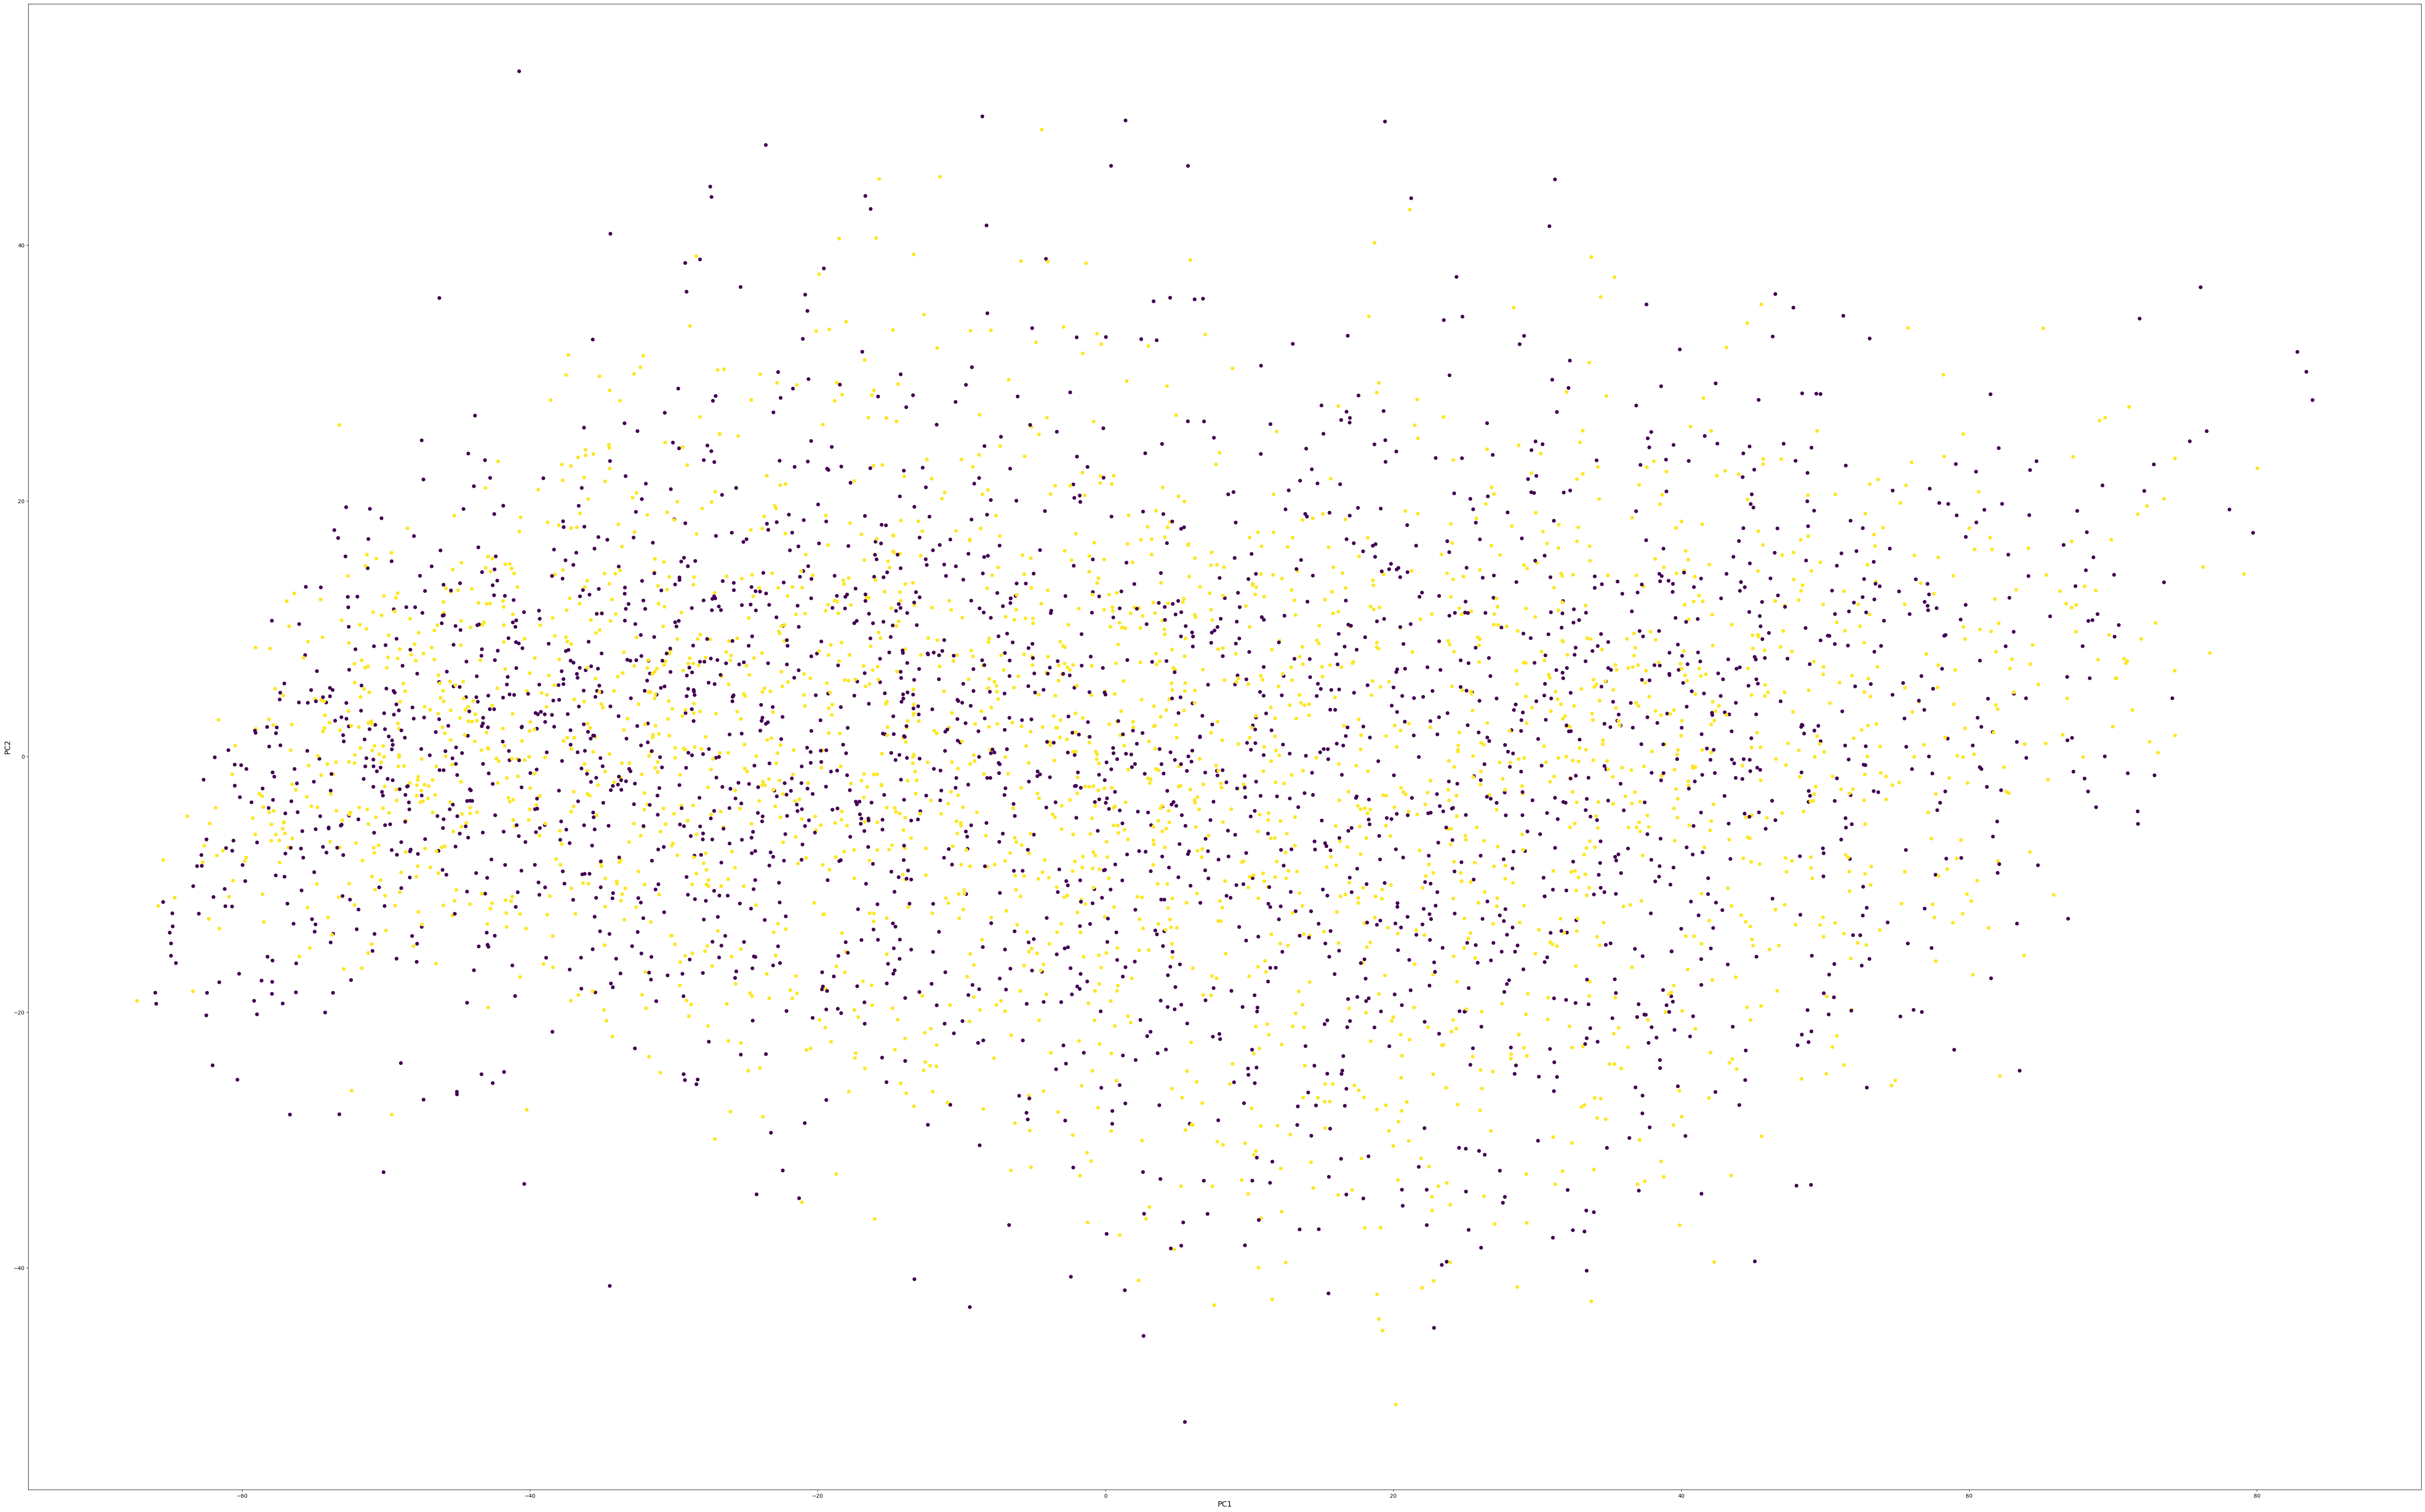

In [64]:
ax = plt.axes()
#ax.set_facecolor("black")
plt.scatter(imagesTrain_pca.iloc[:,0],imagesTrain_pca.iloc[:,1] ,c=labelsTrain['smiling'])
plt.xlabel("PC1" , size=14)
plt.ylabel("PC2" , size=14)
#plt.axis = ("equal")

plt.show()
# classification does not coincide with variation in data

In [89]:
#decision tree#####
model = tree.DecisionTreeClassifier(max_depth=5 ,criterion = 'gini')
model.fit(imagesTrain_pca,labelsTrain['smiling'])
model.score(imagesTest_pca,labelsTest['smiling'])

0.703

In [33]:
#logistic regression is more accurate that decision tree#####
model = LogisticRegression(solver='lbfgs', max_iter=200)
model.fit(imagesTrain_pca, labelsTrain['smiling'])
model.score(imagesTest_pca,labelsTest['smiling'])

0.865

In [42]:
# image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/img/' + '0.jpg')
# image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# plt.imshow(image , cmap='gray', vmin=0, vmax=255)
# plt.show()

In [43]:
#images = list(zip(images))
#images = pd.DataFrame(images,columns=["images"])
#labels = labels.assign(images = images)

In [31]:
hyper_params = {
    'max_features' : [i*5 for i in range(1,30)],
    'max_depth' : [1,2,3,4,5,6,7,None]
}

In [37]:
model = tree.DecisionTreeClassifier()
grid=GridSearchCV(model , param_grid=hyper_params , cv=10 , n_jobs=-1)

In [38]:
grid.fit(imagesTrain_pca,labelsTrain['smiling'])

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_features': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95,
                                          100, 105, 110, 115, 120, 125, 130,
                                          135, 140, 145]})

In [39]:
grid.best_params_

{'max_depth': 4, 'max_features': 145}

[Text(0.5, 0.9166666666666666, 'X[32] <= 0.613\ngini = 0.5\nsamples = 5000\nvalue = [2500, 2500]'),
 Text(0.25, 0.75, 'X[30] <= -0.282\ngini = 0.485\nsamples = 2972\nvalue = [1230, 1742]'),
 Text(0.125, 0.5833333333333334, 'X[37] <= -0.835\ngini = 0.497\nsamples = 1328\nvalue = [713, 615]'),
 Text(0.0625, 0.4166666666666667, 'X[27] <= -0.141\ngini = 0.481\nsamples = 477\nvalue = [192, 285]'),
 Text(0.03125, 0.25, 'X[30] <= -4.901\ngini = 0.402\nsamples = 230\nvalue = [64, 166]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.423\nsamples = 23\nvalue = [16, 7]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.356\nsamples = 207\nvalue = [48, 159]'),
 Text(0.09375, 0.25, 'X[32] <= -1.852\ngini = 0.499\nsamples = 247\nvalue = [128, 119]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.465\nsamples = 117\nvalue = [43, 74]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.453\nsamples = 130\nvalue = [85, 45]'),
 Text(0.1875, 0.4166666666666667, 'X[52] <= 1.265\ngini = 0.475\nsamples = 851

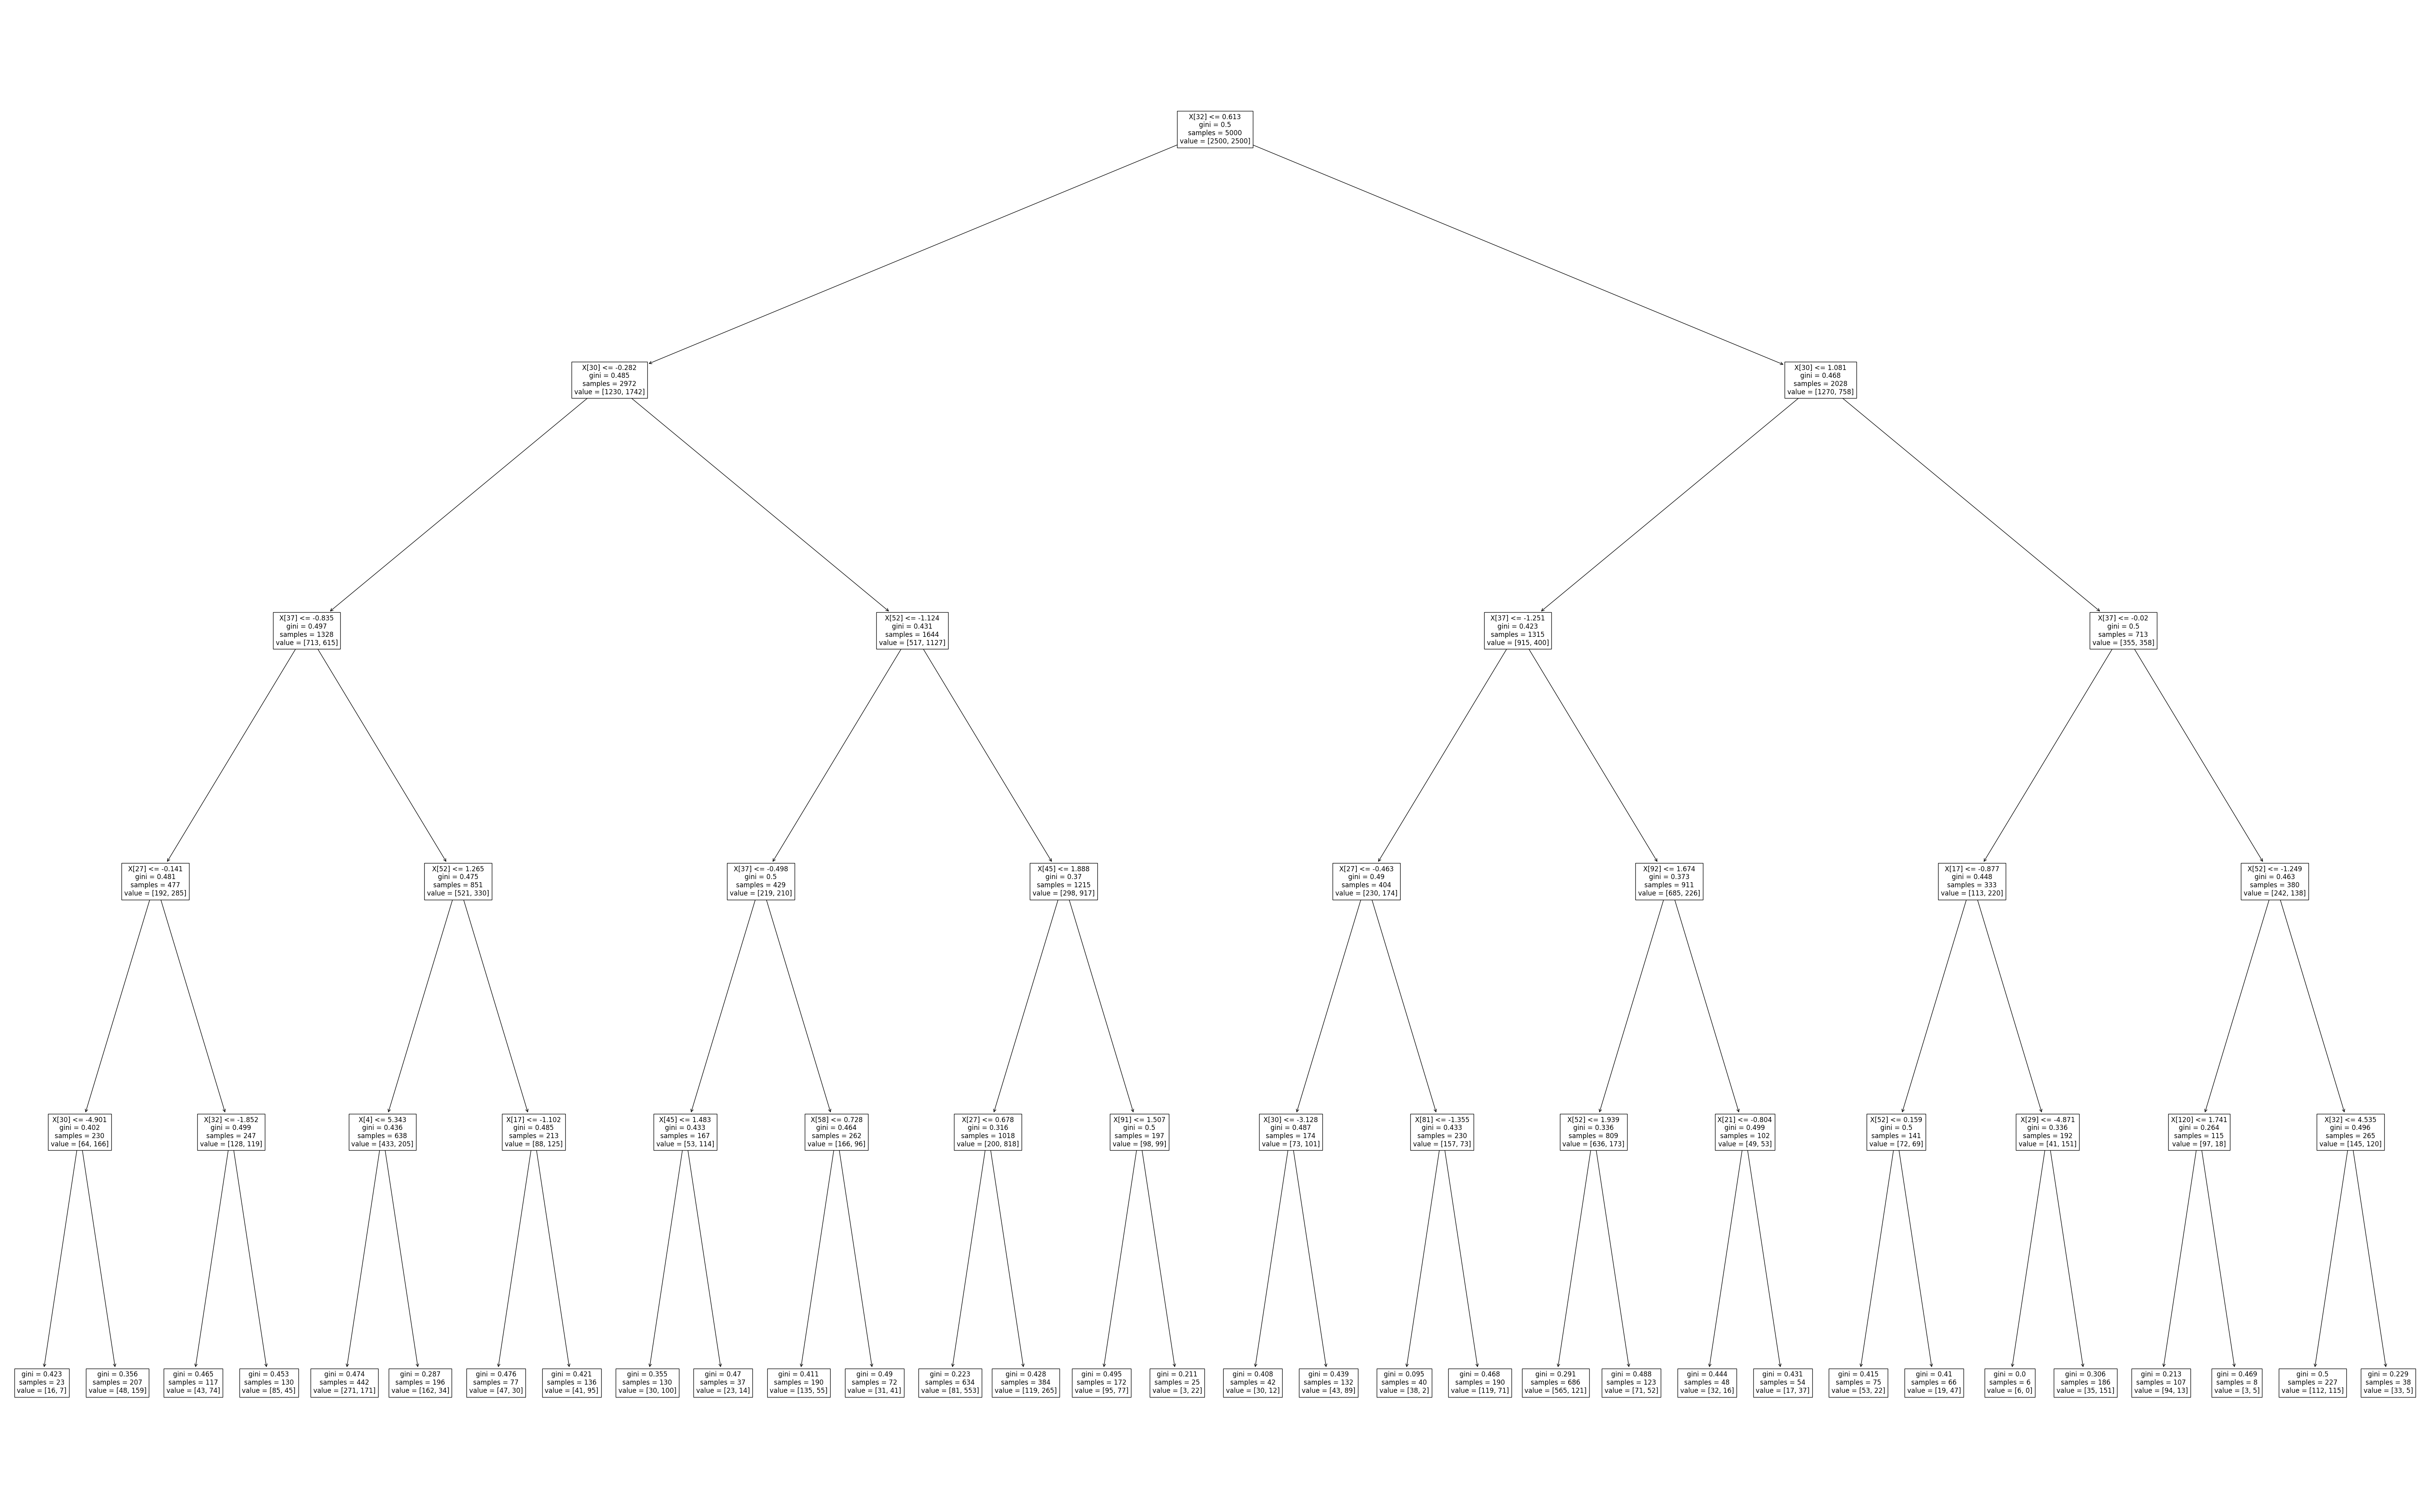

In [24]:
plot_tree(model)